#  Home Credit Default Risk Project
**Completed by:**
1. ALPHONSINAH OTOTO
   - Part of EDA
   - Modelling: XGBOOST, Ensembling
   - Analysis
   - Compiling Notebook
2. TARA CONNIN
   - Part of EDA
   - Linear Logistic Regression
   - Analysis
3. COURTNEY YOSHIMOTO
   - Part of EDA
   - Random Forest
   - Analysis
   - Conclusion

Our Kaggle Score was 0.689


# Table of Contents
1. [EDA](#EDA)
    - [Introduction](#eda-introduction)
    - [Target variable](#exploring-target-variable)
    - [Predictors](#identifying-potential-strong-predictors)
    - [Missing Values](#missing-values)
    - [Outliers](#outliers)
    - [Categorical Values](#encoding-categorical-values)
    - [Feature Engineering](#feature-engineering)
    - [External Datasets](#merging-external-datasets)
    - [Final Data Review](#final-data-review)
    - [Final Data Review](#final-data-review)
2. [Modelling](#Modelling)
    - [Data Preparation](#Data-Preparation)
    - [Training Machine Learning Models](#Training-Machine-Learning-Models)
    - [Evaluating performance of the models](#Evaluating-performance-of-the-models)
    - [Further Hyperparameter Tuning](#Further-Hyperparameter-Tuning)
    - [Ensembling Models to improve predictive performance](#Ensembling-Models-to-improve-predictive-perfomance)
    - [Conclusion](#Conclusion)
      

# EDA


## Introduction

- The goal of this project is to analyze the Home Credit Default Risk dataset in order to predict weather a client with repay a loan. The reason for this project is to help people get financial support, especially those who might be unfairly denied due to not having credit.

- Home Credit Group uses many different data categories, like age, income, and occupation to better predict who can repay their loans. In this notebook we will examine, analyze, and come up with insight from the data given.

- Analytic Problem: Use machine learning to build a classification model where the target variable is TARGET (1 = Default, 0 = No Default).

**Data Description**

- The dataset comes from Home Credit, a financial institution that provides loans to individuals with limited credit history. It includes applicant demographics, financial information, and credit history to predict loan default risk.

- Main Dataset (application_train.csv): Contains loan applications with features like income, credit amount, annuity, employment history, and external credit scores. The target variable (TARGET) indicates whether a client defaulted (1) or not (0).
- Supporting Datasets: Include bureau records, previous loan applications, credit card balances, and installment payments, providing deeper insights into applicant credit behavior.

- The goal of EDA is to explore patterns, relationships, and anomalies that will guide model selection and feature preprocessing.

**Dataset**
- The dataset includes 10 CSV files related to loan applications and credit history from Home Credit. Each file provides different aspects of a client's financial background:

1. application_{train|test}.csv – Contains loan application details. The training set includes an outcome variable, while the test set does not. Each row represents a loan.

2. bureau.csv – Records of past loans from external financial institutions linked to applicants. Multiple entries may exist per client.

3. bureau_balance.csv – Tracks monthly updates for the records in the bureau file, showing how past loans evolved over time.

4. POS_CASH_balance.csv – Contains historical monthly summaries for previous point-of-sale and cash loans from Home Credit.

5. credit_card_balance.csv – Stores past monthly statements for credit cards issued by Home Credit.

6. previous_application.csv – Lists earlier loan applications made by clients, whether approved or not.

7. installments_payments.csv – Logs repayments for past loans, including both completed and missed payments.

8. HomeCredit_columns_description.csv – Provides details about the fields in the dataset.

9. sample_submission.csv – A template for submitting predictions. It includes the ID and the TARGET column (the predicted default status).

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load datasets
train = pd.read_csv("/Users/Tara/Documents/UoU/Capstone 2/home-credit-default-risk/application_train.csv")
test = pd.read_csv("/Users/Tara/Documents/UoU/Capstone 2/home-credit-default-risk/application_test.csv")

# basic info
print(train.shape, test.shape)
train.head()

(307511, 122) (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


 ## Exploring target variable  

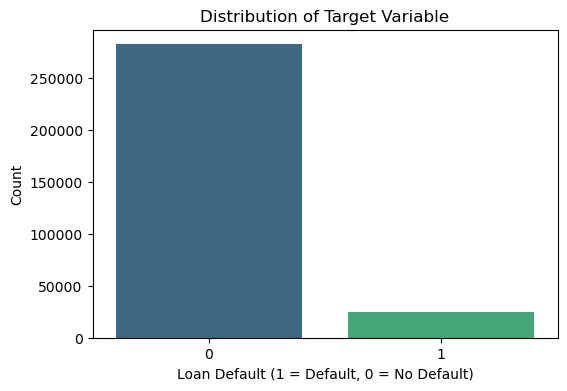

Class 0: 91.93%
Class 1: 8.07%
Baseline accuracy (majority class classifier): 91.93%


In [7]:
 #  Check target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=train, hue='TARGET', palette='viridis', legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Loan Default (1 = Default, 0 = No Default)')
plt.ylabel('Count')
plt.show()

# Class distribution
target_counts = train['TARGET'].value_counts()
print(f"Class 0: {target_counts[0] / len(train):.2%}")
print(f"Class 1: {target_counts[1] / len(train):.2%}")

# Baseline accuracy (predicting the majority class)
baseline_accuracy = max(target_counts) / len(train)
print(f"Baseline accuracy (majority class classifier): {baseline_accuracy:.2%}")



-  The graph shows an imbalanced target variable which will require special attention during model training. Algorithms might tend to predict the majority class more often, which could lead to biased models. 

## Identifying potential strong predictors
- We use a correlation matrix to test the correlation with the target variable
- check the distribution of numeric features

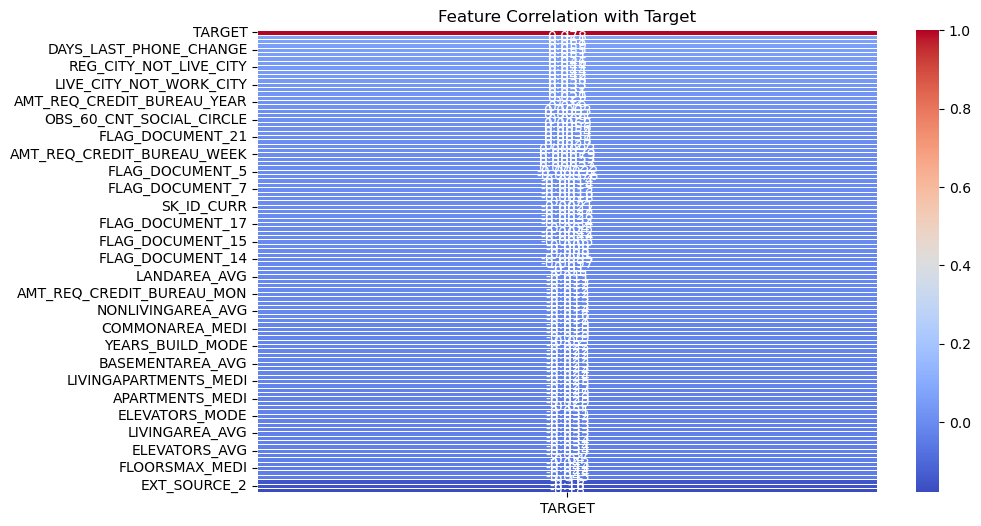

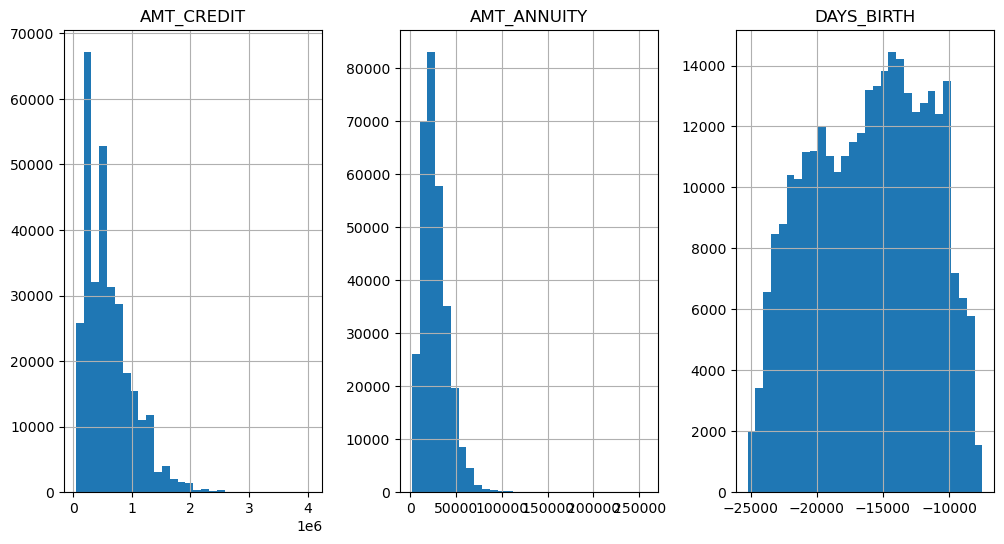

In [10]:

#Correlation matrix
numeric_train = train.select_dtypes(include=['number'])
correlation = numeric_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['TARGET']].sort_values(by='TARGET', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation with Target")
plt.show()

#  distribution of numerical columns
num_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']
train[num_features].hist(figsize=(12, 6), bins=30, layout=(1, 3))
plt.show()

- The heatmap shows a weak correlation between individual predictors and the target variable which means we will need to use advanced modelling techniques to identify important features

- The AMT_CREDIT histogram shows a  right-skewed distribution, meaning that most applicants request lower loan amounts, but there are a few applicants with very high loan amounts. It also shows some extreme values that indicate potential outliers.
- The AMT_ANNUITY histogram also shows a right-skewed distribution, meaning most applicants have smaller annuities, but some have very high repayment amounts.
- DAYS_BIRTH histogram shows a bell-shaped normal distribution, meaning most applicants fall within a reasonable age range.

## Missing Values
- We Checked for missing values and how to handle them

In [13]:
#Checking for missing values
missing_values = train.isnull().sum() / len(train) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64

In [14]:
# Handling missing values

# Drop columns with >50% missing
# Fill missing values (Numerical: Median, Categorical: Mode)
for col in train.columns:
    if col not in test.columns:
        continue

    if train[col].dtype == 'object':
        mode_value = train[col].mode()[0]
        train[col] = train[col].fillna(mode_value)
        test[col] = test[col].fillna(mode_value)
    else:
        median_value = train[col].median()
        train[col] = train[col].fillna(median_value)
        test[col] = test[col].fillna(median_value)

## Outliers
- We used a boxplot to detect outliers in the amount of income


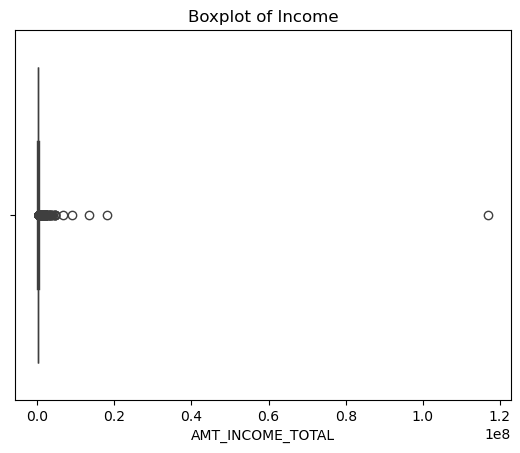

In [16]:
#plot boxplot
sns.boxplot(x=train['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Income')
plt.show()

- The boxplot reveals that the dataset has a large number of relatively modest incomes and a small number of extremely large values, resulting in a heavily skewed distribution and  few outliers are detected in the income distribution.

In [18]:
# Handling outliers
train['AMT_INCOME_TOTAL'] = np.log1p(train['AMT_INCOME_TOTAL'])

- The log1p fuction transforms the data to make it normally distributed and reduce skewness.
- The transformation reduces the impact of outliers and makes income values more evenly distributed, which can help in better analysis and predictions.

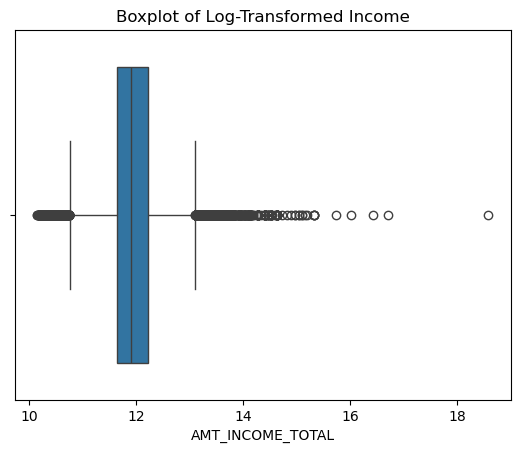

In [20]:
sns.boxplot(x=train['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Log-Transformed Income')
plt.show()

## Encoding categorical values
- We Converted categorical variables into a numerical format for machine Learning and also to Prevent multicollinearity by dropping the first category.
- This will ensure the train and test datasets have the same structure for ML models.


In [22]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

## Feature Engineering
- We create new features from existing columns to help with further analysis.


In [24]:
train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_INCOME_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['AGE_YEARS'] = np.ceil(train['DAYS_BIRTH'] / -365) #rounded up the age to a whole number 

## Merging External Datasets
- We join application data with bureau.csv


In [26]:
bureau = pd.read_csv("/Users/Tara/Documents/UoU/Capstone 2/home-credit-default-risk/bureau.csv")

# Aggregate bureau data
bureau_agg = bureau.groupby("SK_ID_CURR").agg({"AMT_CREDIT_SUM": "sum", "CREDIT_ACTIVE": "count"})
bureau_agg.columns = ["TOTAL_CREDIT_SUM", "NUM_CREDITS"]
train = train.merge(bureau_agg, on="SK_ID_CURR", how="left")
test = test.merge(bureau_agg, on="SK_ID_CURR", how="left")

## Final Data Review 

In [28]:
train.to_csv("cleaned_train.csv", index=False)
test.to_csv("cleaned_test.csv", index=False)



In [29]:
#Results
cleaned_traindf =pd.read_csv("cleaned_train.csv")
cleaned_traindf.head(20)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,AGE_YEARS,TOTAL_CREDIT_SUM,NUM_CREDITS
0,100002,1,0,12.218500,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,True,False,False,33277.202320,2021.565641,26.0,865055.565,8.0
1,100003,0,0,12.506181,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,103429.056883,2854.468536,46.0,1017400.500,4.0
2,100004,0,0,11.119898,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,True,False,False,False,12140.399466,607.019973,53.0,189037.800,2.0
3,100006,0,0,11.813037,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,True,False,False,False,26469.271847,2513.028515,53.0,NaN,NaN
4,100007,0,0,11.707678,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,True,False,False,False,43817.399999,1867.620584,55.0,146250.000,1.0
5,100008,0,0,11.502885,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,False,True,False,False,False,42641.084405,2392.225902,47.0,468445.500,3.0
6,100009,0,1,12.049425,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,False,True,False,False,False,129527.014028,3427.632529,38.0,4800811.500,18.0
7,100010,0,0,12.793862,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,False,True,False,False,False,119588.595645,3288.686380,52.0,990000.000,2.0
8,100011,0,0,11.630717,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,False,True,False,False,False,87665.271699,2908.376059,56.0,435228.300,4.0
9,100012,0,0,11.813037,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,False,True,False,False,False,34284.154368,1714.207718,40.0,NaN,NaN


# Modelling

##  Data Preparation

- Preparing data by separating the features and target variable and performing a train-test split.
- We used 80% of the data for training and 20% for validation.
- We handled missing values using Imputer, handled class imbalance, and did feature scaling for better performance

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train['TARGET']

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Handle Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_resampled.value_counts())


# Feature Scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_imputed)

print("Data preprocessing completed successfully!")


Original class distribution: TARGET
0    226148
1     19860
Name: count, dtype: int64
Resampled class distribution: TARGET
0    226148
1    113074
Name: count, dtype: int64
Data preprocessing completed successfully!


## Training Machine Learning Models

In [34]:
# 1. Logistic linear Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, solver='liblinear')
# We increased the number of iterations to allow more time for convergence and used liblinear solver, which handles linear classification well.
logreg.fit(X_train_scaled, y_train_resampled)
y_pred = logreg.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.54     61503
weighted avg       0.90      0.69      0.76     61503



- The logistic regregression model has an accuracy of 0.82 meaning the model correctly predicts around 82% of the cases.
- The model performs well on the majority class (0) with high precision and recall.
- Performance on the minority class (1) is lower, but not drastically bad, indicating some success in identifying defaults.


In [36]:
#2. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Converting scaled data back to DataFrame with original feature names since Random classifier will return an error on numpy array
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Training the model
rf = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 5}, random_state=42)
rf.fit(X_train_scaled_df, y_train_resampled)
#Predictions
y_pred_rf = rf.predict(X_test_scaled_df)

# Printing the classification report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       1.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.93      0.92      0.88     61503




- The model correctly predicted 92% of all instances.

- Precision (0.79): An average of precision scores across both classes.

- Recall (0.50): Shows the model is only effective for one class.

- F1-Score (0.48): The poor performance on the minority class pulls down the score.

- Weighted Avg: Takes class imbalance into account.

- Precision (0.90), Recall (0.92), and F1-Score (0.88) reflect the majority class's dominance.

- We adjusted the class weights, there was a slight improvement, but the model did not perform so well. The high accuracy(0.92) is misleading since it primarily comes from correctly predicting the majority class (0), not the minority class (1)

In [44]:
# XGBoost
!pip install xgboost
from xgboost import XGBClassifier

# scale_pos_weight
scale_pos_weight = (len(y_train_resampled) - sum(y_train_resampled)) / sum(y_train_resampled)

# XGBoost model ( We fine-tuned it to make the model a little better)
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    learning_rate=0.05,      
    max_depth=6,              
    n_estimators=300,       
    gamma=0.1,            
    subsample=0.8,           
    colsample_bytree=0.8,   
    random_state=42
)

xgb.fit(X_train_resampled, y_train_resampled)

# Predicting probabilities instead of labels
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# custom threshold to increase recall for the minority class
threshold = 0.3
y_pred_xgb = (y_proba_xgb > threshold).astype(int)

# classification report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93     56538
           1       0.27      0.35      0.30      4965

    accuracy                           0.87     61503
   macro avg       0.61      0.63      0.62     61503
weighted avg       0.89      0.87      0.88     61503



- The model correctly classified 87% of all instances, which is a high accuracy. 

- Macro Average:

     -  Precision (0.61): This is the average precision across both classes. It reflects the balance between the precision of predicting class 0 and class 1.

     - Recall (0.64): This indicates that the model is performing better on identifying actual samples of both classes.

    - F1-Score (0.62): The macro average F1-score is reasonable
 
      
- Weighted Average:

    - Precision (0.89): The weighted precision is high because class 0 (the majority class) is well classified.

    - Recall (0.87): The model performs reasonably well on the overall recall, mainly due to good performance on class 0.

    - F1-Score (0.88): A solid F1-score weighted by the class distribution, showing a decent overall balance.



##  Evaluating performance of the models

In [48]:
from sklearn.metrics import roc_auc_score

# AUC-ROC scores to 2 decimal places
logreg_auc = round(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]), 2)
rf_auc = round(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]), 2)
xgb_auc = round(roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]), 2)

# results
print("Logistic Regression AUC-ROC:", logreg_auc)
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)



Logistic Regression AUC-ROC: 0.75
Random Forest AUC-ROC: 0.49
XGBoost AUC-ROC: 0.76


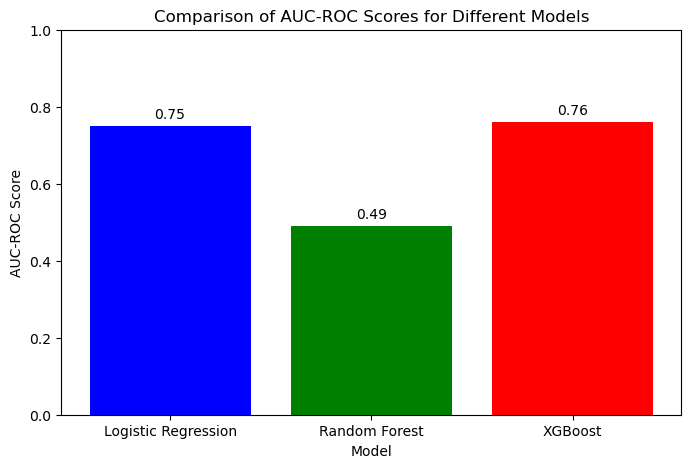

In [50]:
import matplotlib.pyplot as plt

# AUC-ROC scores
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
auc_scores = [logreg_auc, rf_auc, xgb_auc]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, auc_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('Comparison of AUC-ROC Scores for Different Models')
plt.ylim(0, 1)  # Since AUC-ROC ranges between 0 and 1

for i, score in enumerate(auc_scores):
    plt.text(i, score + 0.02, str(score), ha='center')

plt.show()


- XGBoost has the highest AUC of 0.76, which means it is the best at distinguishing between the two classes.

- Logistic Regression follows closely with an AUC of 0.75, showing solid performance.

- Random Forest has the lowest AUC of 0.54, suggesting it is not effective at distinguishing the classes, and its performance is close to random guessing.

-  Since XGBoost perfomed best, we did further hyperparameter tuning using  RandomizedSearchCV to optimize parameters

## Further Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier  # Import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBClassifier with the scale_pos_weight parameter
xgb_tuned = RandomizedSearchCV(XGBClassifier(scale_pos_weight=(len(y_train_resampled) / sum(y_train_resampled))), 
                               param_grid, scoring='roc_auc', n_iter=10, cv=3, random_state=42)

xgb_tuned.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", xgb_tuned.best_params_)


Best parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}


In [58]:
# Using the best parameters from RandomizedSearchCV
best_xgb = XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, scale_pos_weight=(len(y_train_resampled) / sum(y_train_resampled)), random_state=42)

# Train the model
best_xgb.fit(X_train_resampled, y_train_resampled)

#  predictions
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report for Optimized XGBoost:")
print(classification_report(y_test, y_pred_xgb_best))

# AUC-ROC score
auc_xgb_best = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print(f"Optimized XGBoost AUC-ROC: {auc_xgb_best:.2f}")

Classification Report for Optimized XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56538
           1       0.34      0.18      0.24      4965

    accuracy                           0.91     61503
   macro avg       0.64      0.57      0.59     61503
weighted avg       0.88      0.91      0.89     61503

Optimized XGBoost AUC-ROC: 0.75


- After the hyperparameter tuning there was no significant improvement on the AUC- ROC Score, so we further tried Ensembling the models to see if there is a better predictive perfomance.

##  Ensembling Models to improve predictive perfomance

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [64]:
# base estimators 
estimators = [
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, scale_pos_weight=(len(y_train_resampled) / sum(y_train_resampled)), random_state=42))
]

# stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, solver='liblinear'),  
    cv=5
)

# stacking model training on the resampled data
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Classification report
print("Classification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred_stack))

# AUC-ROC score
stack_auc_score = roc_auc_score(y_test, stacking_clf.predict_proba(X_test_scaled)[:, 1])
print(f"Stacking Classifier AUC-ROC: {stack_auc_score:.2f}")


Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56538
           1       0.07      0.01      0.02      4965

    accuracy                           0.91     61503
   macro avg       0.50      0.50      0.49     61503
weighted avg       0.85      0.91      0.88     61503

Stacking Classifier AUC-ROC: 0.56


In [66]:
# Create DataFrame with true and predicted values
results_df = pd.DataFrame({
    'TARGET': y_test,
    'PREDICTED_TARGET': y_pred_stack
})

# Export to CSV
results_df.to_csv("ensemble_predictions.csv", index=False)
print("Exported predictions to ensemble_predictions.csv")


Exported predictions to ensemble_predictions.csv


In [68]:
# Comparing individual Models with the Stacking Model
print(f"Logistic Regression AUC-ROC: {roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]):.2f}")
print(f"Random Forest AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]):.2f}")
print(f"Stacking Classifier AUC-ROC: {stack_auc_score:.2f}")

Logistic Regression AUC-ROC: 0.75
Random Forest AUC-ROC: 0.49
XGBoost AUC-ROC: 0.76
Stacking Classifier AUC-ROC: 0.56


- The Stacking Classifier performed very well for the majority class (0) but failed almost entirely for the minority class (1).

- The model has a strong bias towards predicting the majority class.

- The AUC-ROC of 0.57 further confirms that the model lacks discriminatory power.

# Conclusion

- We evaluated different learning machine models,  focusing on balancing model performance and interpretability.
- Logistic Regression encountered convergence issues due to feature scaling and complexity in data patterns, while Random Forest did not yield significant improvements.
- Class imbalance and optimizing hyperparameters were crucial steps in improving model performance.
- After evaluation, XGBoost was the most effective model, with an AUC-ROC of 0.76 and robustness across different evaluation metrics. Its ability to handle complex relationships in the data while maintaining efficiency made it the optimal choice for this task.
- We further tried  ensembling models to improve predictive perfomance but the model was affected highly by class imbalance so XGBoost remained our preffered model.

In [70]:
import numpy as np

# y_test: actual default labels (0 or 1)
# y_proba_xgb: predicted default probabilities from your model

# Define rejection policy: reject top 20% riskiest applicants
threshold = np.quantile(y_proba_xgb, 0.80)
approved = y_proba_xgb <= threshold

# Calculate new default rate among approved clients only
new_default_rate = sum(y_test[approved] == 1) / len(y_test[approved])

# Compare with original default rate
original_default_rate = sum(y_test == 1) / len(y_test)

print(f"Original Default Rate: {original_default_rate * 100:.2f}%")
print(f"New Default Rate (after rejecting top 20% risk): {new_default_rate * 100:.2f}%")


Original Default Rate: 8.07%
New Default Rate (after rejecting top 20% risk): 4.90%


In [72]:
import numpy as np

# y_test: actual labels
# y_proba_xgb: predicted probabilities from XGBoost model (use predict_proba)

# Sort predicted probabilities
threshold = np.quantile(y_proba_xgb, 0.80)  # Top 20% risk clients
high_risk_flags = y_proba_xgb > threshold

# Count total and caught defaulters
total_defaults = sum(y_test == 1)
caught_defaults = sum((y_test == 1) & (high_risk_flags))

# Avoided default rate
percent_avoided = caught_defaults / total_defaults

print(f"Defaults avoided by rejecting top 20% highest-risk clients: {percent_avoided * 100:.2f}%")


Defaults avoided by rejecting top 20% highest-risk clients: 51.46%


In [92]:
# Step 1: Load application_train.csv if not already done
import pandas as pd

application_train = pd.read_csv("/Users/Tara/Documents/UoU/Capstone 2/home-credit-default-risk/application_train.csv")  # adjust path as needed

# Step 2: Align credit info with your test set
# Assuming y_test is aligned with X_test, and X_test was split from application_train
credit_test = application_train.loc[X_test.index, "AMT_CREDIT"]

# Step 3: Identify top 20% high-risk applicants
import numpy as np

threshold = np.quantile(y_proba_xgb, 0.80)
high_risk_flags = y_proba_xgb > threshold

# Step 4: Calculate true avoidable losses
credit_high_risk = credit_test[high_risk_flags].sum()
default_rate_high_risk = y_test[high_risk_flags].sum() / sum(high_risk_flags)
estimated_loss_high_risk = credit_high_risk * default_rate_high_risk

# Step 5: Output
print(f"High-Risk Credit Volume: ${credit_high_risk / 1e9:.2f}B")
print(f"Default Rate in High-Risk Group: {default_rate_high_risk * 100:.2f}%")
print(f"Estimated Avoidable Losses by Rejecting High-Risk Clients: ${estimated_loss_high_risk / 1e9:.2f}B")





High-Risk Credit Volume: $6.54B
Default Rate in High-Risk Group: 20.77%
Estimated Avoidable Losses by Rejecting High-Risk Clients: $1.36B


In [94]:
# Filter rows where TARGET == 1 (defaulted clients)
defaulted_clients = application_train[application_train["TARGET"] == 1]

# Sum their AMT_CREDIT values
actual_default_losses = defaulted_clients["AMT_CREDIT"].sum()

# Print result in billions
print(f"Actual Losses Due to Defaults: ${actual_default_losses / 1e9:.2f}B")



Actual Losses Due to Defaults: $13.85B
